# 1. General Data Preparation

Tasks to perform:  

1.1. Cast fields to appropriate types  
1.2. Relabel genres

In [17]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [18]:
# read data
songs_df = pd.read_csv('Data/songs_1.csv')
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9731 entries, 0 to 9730
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   song_title          9731 non-null   object 
 1   artist_name         9731 non-null   object 
 2   song_id             9731 non-null   object 
 3   duration_ms         9731 non-null   int64  
 4   energy              9731 non-null   float64
 5   key                 9731 non-null   int64  
 6   mode                9731 non-null   int64  
 7   time_signature      9731 non-null   int64  
 8   acousticness        9731 non-null   float64
 9   danceability        9731 non-null   float64
 10  instrumentalness    9731 non-null   float64
 11  liveness            9731 non-null   float64
 12  loudness            9731 non-null   float64
 13  speechiness         9731 non-null   float64
 14  valence             9731 non-null   float64
 15  tempo               9731 non-null   float64
 16  On_cha

In [19]:
songs_df.head()

song_title            artist_name  \
0  Christum wir sollen loben schon, BWV 121 for t...  Johann Sebastian Bach   
1               Sonata No.6 In G, BWV 530: 1. Vivace  Johann Sebastian Bach   
2  Canonic Variations on "Vom Himmel hoch, da kom...  Johann Sebastian Bach   
3   Prelude and Fugue in E Major, BWV 566: II. Fugue  Johann Sebastian Bach   
4  Der Friede sei mit dir, BWV 158: III. Nun Herr...  Johann Sebastian Bach   

                  song_id  duration_ms  energy  key  mode  time_signature  \
0  2MifLu0vsP0lhBSv9zOeeG        61987   0.168    3     0               4   
1  39mNcVlYKIFQnA0pXqLvoR       247840   0.323    7     1               4   
2  2PRvpHVb2c8eLHqGeSSnIj       223773   0.112    0     1               3   
3  5ndjkRAi1Uld5EqWBvmoZ3       540613   0.127    1     1               4   
4  12aZooiKUiQDl3kp9Wukdg        97440   0.115    3     0               3   

   acousticness  danceability  ...   tempo  On_chart  release_date  \
0         0.969        0.2710  ...  97.977         0    2018-09-28   
1         0.757        0.2550  ...  88.154         0    2018-10-19   
2         0.960        0.2080  ...  96.907         0    2018-10-26   
3         0.673        0.0869  ...  47.380         0    2018-10-26   
4         0.979        0.3670  ...  96.209         0    2018-04-20   

                artist_id                 artist  explicit  popularity  \
0  5aIqB5nVVvmFsvSdExz408  Johann Sebastian Bach     False           0   
1  5aIqB5nVVvmFsvSdExz408  Johann Sebastian Bach     False           0   
2  5aIqB5nVVvmFsvSdExz408  Johann Sebastian Bach     False           0   
3  5aIqB5nVVvmFsvSdExz408  Johann Sebastian Bach     False           0   
4  5aIqB5nVVvmFsvSdExz408  Johann Sebastian Bach     False           0   

  days_since_release artist_followers    genre  
0               1089          3365621  baroque  
1               1068          3365621  baroque  
2               1061          3365621  baroque  
3               1061          3365621  baroque  
4               1250          3365621  baroque  

[5 rows x 25 columns]

In [20]:
# case normalize col names
songs_df.columns = map(str.lower, songs_df.columns)
songs_df.columns

Index(['song_title', 'artist_name', 'song_id', 'duration_ms', 'energy', 'key',
       'mode', 'time_signature', 'acousticness', 'danceability',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence',
       'tempo', 'on_chart', 'release_date', 'artist_id', 'artist', 'explicit',
       'popularity', 'days_since_release', 'artist_followers', 'genre'],
      dtype='object')

In [21]:
# find cols with missing values
na_srs = songs_df.isna().sum()
na_srs[na_srs > 0]

Series([], dtype: int64)

In [22]:
# type cast cols

# map explicit to 1-0
songs_df['explicit'] = np.where(songs_df['explicit']=='True', 1, 0)
songs_df.explicit.head()

0    0
1    0
2    0
3    0
4    0
Name: explicit, dtype: int32

In [23]:
# check for duplicates

songs_df = songs_df.drop_duplicates(subset=['song_title', 'artist'])
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9693 entries, 0 to 9730
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   song_title          9693 non-null   object 
 1   artist_name         9693 non-null   object 
 2   song_id             9693 non-null   object 
 3   duration_ms         9693 non-null   int64  
 4   energy              9693 non-null   float64
 5   key                 9693 non-null   int64  
 6   mode                9693 non-null   int64  
 7   time_signature      9693 non-null   int64  
 8   acousticness        9693 non-null   float64
 9   danceability        9693 non-null   float64
 10  instrumentalness    9693 non-null   float64
 11  liveness            9693 non-null   float64
 12  loudness            9693 non-null   float64
 13  speechiness         9693 non-null   float64
 14  valence             9693 non-null   float64
 15  tempo               9693 non-null   float64
 16  on_cha

In [24]:
# explore genres

genre_count_df = songs_df.genre.value_counts().reset_index().rename(columns={'index':'genre', 'genre':'count'})
genre_count_df

genre  count
0                  rock   1542
1                   pop   1271
2               country    721
3                   rap    380
4                  soul    357
..                  ...    ...
861  indietronica vapor      1
862     baroque italian      1
863            desi hip      1
864             calypso      1
865    funk minneapolis      1

[866 rows x 2 columns]

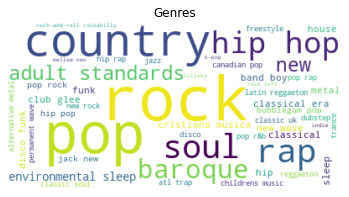

In [25]:
# function to generate wordcloud

from wordcloud import WordCloud

def gen_wordcloud(data, title):
    wc = WordCloud(background_color="white", max_words=50).generate_from_frequencies(data)
    plt.title(title)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

d = {genre: count for genre, count in genre_count_df.values}

gen_wordcloud(d, 'Genres')

In [26]:
# genre count plot

genre_count_df = genre_count_df.sort_values('count', ascending=False).head(10)
plt.figure(figsize=(20, 10))
plt.title(f"Counts of songs by Genre (total={genre_count_df['count'].sum()})", fontsize=24)
plt.xlabel('genre', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
sns.barplot(x='genre', y='count', data=genre_count_df)

<AxesSubplot:title={'center':'Counts of songs by Genre (total=5222)'}, xlabel='genre', ylabel='count'>

In [27]:
# remap c-pop

chinese_pop_keywords = '|'.join(['chinese pop', 'chinese viral pop', 'c-pop', 'mandopop', 'cantopop'])
songs_df['genre_new'] = np.where(
    songs_df['genre'].str.contains(chinese_pop_keywords),
    'mandopop', songs_df['genre'])
songs_df.genre_new.value_counts().shape

(866,)

In [28]:
# remap classical

songs_df['genre_new'] = np.where(songs_df['genre'].str.contains('classical'),
                                                    'classical', 
                                                    songs_df['genre']
                                    )


In [29]:
# wordcloud of genre remapped

songs_df = songs_df.drop(columns='genre').rename(columns={'genre_new':'genre'})

genre_rmp_count_df = songs_df.genre.value_counts().reset_index().rename(columns={'index':'genre', 'genre':'count'})
d = {genre: count for genre, count in genre_rmp_count_df.values}

gen_wordcloud(d, 'Genres (remapped)')

<AxesSubplot:title={'center':'Counts of songs by Genre (remapped) total=8427'}, xlabel='genre', ylabel='count'>

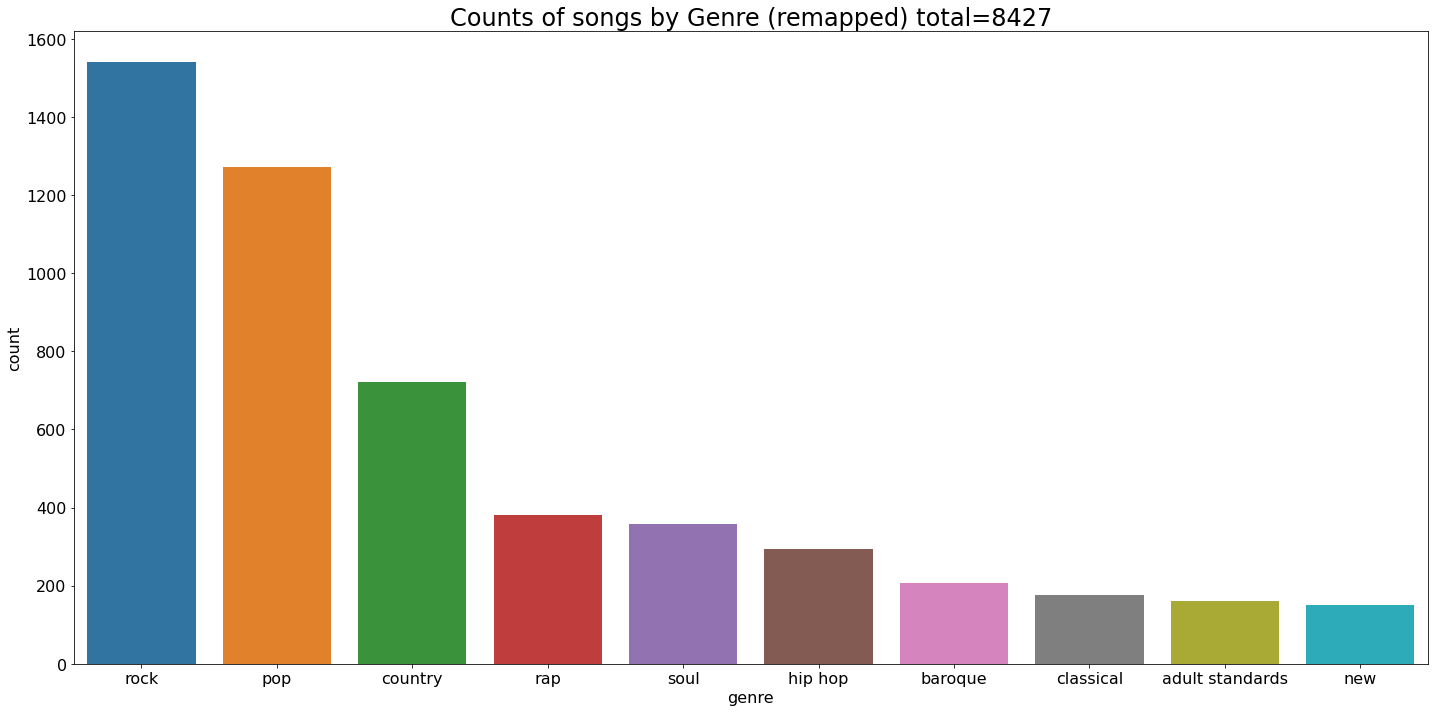

In [30]:
# select genres with at least 5 instances
final_genre_count_df = genre_rmp_count_df.query('count >5')

plot_genre_count_df = final_genre_count_df.head(10)
plt.figure(figsize=(20, 10))
plt.title(f"Counts of songs by Genre (remapped) total={final_genre_count_df['count'].sum()}",
             fontsize=24)
plt.xlabel('genre', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
sns.barplot(x='genre', y='count', data=plot_genre_count_df)

In [31]:
final_songs_df = songs_df[songs_df['genre'].isin(final_genre_count_df.genre)]
final_songs_df.on_chart.value_counts()

1    6650
0    1777
Name: on_chart, dtype: int64

In [32]:
# write to csv 
final_songs_df.to_csv('Data/songs_2.csv', index=False, encoding='utf_8_sig')

# # summary
final_songs_df.describe()

duration_ms       energy          key         mode  time_signature  \
count  8.427000e+03  8427.000000  8427.000000  8427.000000     8427.000000   
mean   2.328424e+05     0.611559     5.227958     0.684823        3.908983   
std    8.410487e+04     0.232460     3.590132     0.464614        0.465418   
min    4.867000e+03     0.000019     0.000000     0.000000        0.000000   
25%    1.903470e+05     0.468000     2.000000     0.000000        4.000000   
50%    2.238390e+05     0.642000     5.000000     1.000000        4.000000   
75%    2.626135e+05     0.792500     8.000000     1.000000        4.000000   
max    1.524333e+06     1.000000    11.000000     1.000000        5.000000   

       acousticness  danceability  instrumentalness     liveness     loudness  \
count   8427.000000   8427.000000       8427.000000  8427.000000  8427.000000   
mean       0.283438      0.587722          0.092186     0.194426    -9.422840   
std        0.300490      0.178718          0.248312     0.174353     5.579964   
min        0.000000      0.000000          0.000000     0.000000   -58.480000   
25%        0.036750      0.489000          0.000000     0.090700   -11.557500   
50%        0.162000      0.608000          0.000016     0.123000    -8.038000   
75%        0.454000      0.715000          0.002935     0.241000    -5.642000   
max        0.996000      0.970000          1.000000     0.999000     0.726000   

       speechiness      valence        tempo    on_chart  explicit  \
count  8427.000000  8427.000000  8427.000000  8427.00000    8427.0   
mean      0.081342     0.537007   119.203891     0.78913       0.0   
std       0.095105     0.265618    29.716045     0.40795       0.0   
min       0.000000     0.000000     0.000000     0.00000       0.0   
25%       0.033300     0.331000    97.734000     1.00000       0.0   
50%       0.044500     0.553000   118.826000     1.00000       0.0   
75%       0.077200     0.754000   137.554000     1.00000       0.0   
max       0.951000     0.989000   212.246000     1.00000       0.0   

        popularity  days_since_release  artist_followers  
count  8427.000000         8427.000000      8.427000e+03  
mean     37.942447         6982.398718      4.640972e+06  
std      24.710801         6018.712598      1.075264e+07  
min       0.000000            4.000000      3.800000e+01  
25%      16.000000         1280.500000      1.232945e+05  
50%      41.000000         5261.000000      8.695470e+05  
75%      59.000000        11951.000000      3.580272e+06  
max      90.000000        44458.000000      8.500939e+07